# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Retrieve data

In [2]:
dataset = pd.read_csv('../raw_data/HR_Engagement_Sat_Sales_UpdatedV4.0.csv')

In [3]:
pd.set_option('display.max_columns', None)
print(dataset.shape)
dataset.head()

(14999, 62)


,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


# Exploring the dataset

## First approximation : Select only numerical columns

In [4]:
# Drop NAME column AND ID column
dataset = dataset.drop(columns=['Name', 'ID'])
print(dataset.shape)

(14999, 60)


In [5]:
# Select only numerical columns in dataset
dataset = dataset.select_dtypes(exclude=[object])
print(dataset.shape)
dataset.head()

(14999, 54)


,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


## Drop duplicates

In [6]:
#Shows if there are duplicated rows
dataset.duplicated().value_counts()

False    14999
Name: count, dtype: int64

In [7]:
#Shows if there are duplicated rows
dataset.duplicated().sum() 

0

## Missing data

In [8]:
print(dataset.shape)
dataset.head()

(14999, 54)


,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [9]:
#Extract only full columns of the dataset
filling = dataset.count()/len(dataset) == 1
filling = filling[filling == True]
full_col_names = filling.index.to_list()
full_col_names

dataset = dataset[full_col_names]
print(dataset.shape)
dataset.head()

(14999, 44)


,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,0,3,6,6,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


## Keep higher variance columns

In [10]:
# Keep higher standard deviations columns AND target
high_std_col = dataset.std().sort_values(ascending=False).head(5)
high_std_col_names = high_std_col.index.to_list()

if 'left_Company' not in high_std_col_names:
    high_std_col_names.append('left_Company')

dataset = dataset[high_std_col_names]
print(dataset.shape)
dataset.head()

(14999, 6)


,Sensor_StepCount,average_montly_hours,LinkedIn_Hits,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,1841,168,5,61,9,0
1,1990,159,58,90,8,0
2,3193,282,42,80,8,0
3,3248,278,37,77,6,0
4,3149,256,6,80,10,0


## Outliers

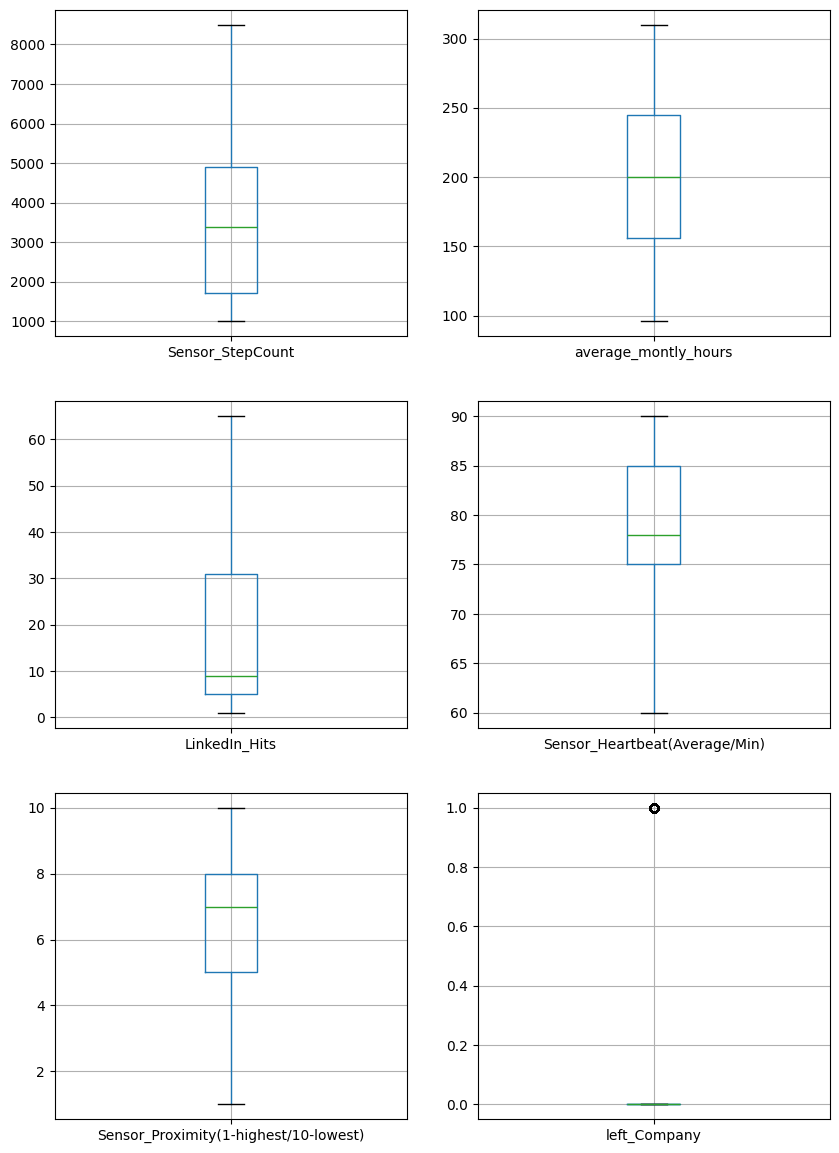

In [11]:
#Check for outliers
cols = dataset.columns.to_list()

plt.figure(figsize=(10,50))
suplot_lines = 10
suplot_columns = 2

for index, col in enumerate(cols):
    plt.subplot(suplot_lines,suplot_columns,index+1)
    dataset.boxplot(column=col);

# Prepare data

## Define X (features)

In [14]:
#Features
X = dataset.drop(columns=['left_Company'])
print(X.shape)
X.head()

(14999, 5)


,Sensor_StepCount,average_montly_hours,LinkedIn_Hits,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1841,168,5,61,9
1,1990,159,58,90,8
2,3193,282,42,80,8
3,3248,278,37,77,6
4,3149,256,6,80,10


## Define y (target)

In [15]:
#Target
y = dataset['left_Company']
print(y.shape)
y.head()

(14999,)


0    0
1    0
2    0
3    0
4    0
Name: left_Company, dtype: int64

## Check target balance

In [16]:
# Checking balance
y.value_counts()/len(y)*100

left_Company
0    76.191746
1    23.808254
Name: count, dtype: float64

**The target is imbalanced.** <br>
**Let's correct it by oversampling the upcoming train set.**

## Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [18]:
# Check that target train set is imbalanced
y_train.value_counts()/len(y_train)*100

left_Company
0    75.997714
1    24.002286
Name: count, dtype: float64

## Oversampling

In [19]:
#Instanciating SMOTE
smote = SMOTE()

In [20]:
#Oversampling features and target
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
# Check that target resampled train set is imbalanced
y_train_resampled.value_counts()/len(y_train_resampled)*100

left_Company
0    50.0
1    50.0
Name: count, dtype: float64

In [22]:
#Check shapes
print(f"X_train shape is : {X_train.shape}")
print(f"y_train shape is : {y_train.shape}\n")
print(f"X_train_resampled shape is : {X_train_resampled.shape}")
print(f"y_train_resampled shape is : {y_train_resampled.shape}")

X_train shape is : (10499, 5)
y_train shape is : (10499,)

X_train_resampled shape is : (15958, 5)
y_train_resampled shape is : (15958,)


## Standard scaler

In [23]:
#Instanciating StandardScaler
std_scaler = StandardScaler().set_output(transform="pandas")

In [24]:
#Fitting scaler to features
std_scaler.fit(X_train_resampled)

StandardScaler()

In [25]:
#Transform the features with the scaler
X_train_resampled_std = std_scaler.transform(X_train_resampled)
print(X_train_resampled_std.shape)
X_train_resampled_std.head()

(15958, 5)


,Sensor_StepCount,average_montly_hours,LinkedIn_Hits,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1.277832,-0.740301,-0.489894,-0.616725,1.101786
1,1.376288,0.540313,-0.436142,0.221794,-0.491969
2,-1.038750,-0.610384,1.337669,1.419678,0.703348
3,1.196566,-0.220631,-0.597397,-0.976090,0.703348
4,1.110092,0.243359,-0.919908,0.221794,-0.093530


# Logistic regression

## Fitting step

In [26]:
# Instanciate the logistic regression model
log_reg_mdl = LogisticRegression()
log_reg_mdl

LogisticRegression()

In [27]:
#Fitting the model to train set (features and target)
log_reg_mdl.fit(X_train_resampled_std,y_train_resampled)

LogisticRegression()

## Evaluation

### Quick score

In [28]:
#Score on train set
log_reg_mdl.score(X_train_resampled_std,y_train_resampled)

0.806116054643439

In [29]:
#Score on test set
log_reg_mdl.score(X_test,y_test)

0.7664444444444445

### Cross validation

In [30]:
cv_results = cross_validate(log_reg_mdl,
                            X_train_resampled_std, 
                            y_train_resampled, 
                            cv=5, 
                            scoring=['precision'])

score = cv_results['test_precision'].mean()
score

0.7834608591128489